## Bonus Analysis

In this fictional scenario, I start to wonder if the data given to me by my "boss" was just made up to test my ability to create a database.  So I connect to the database via Python to analyze the data with some plots.

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import psycopg2
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from config import database_name
from config import user_name
from config import db_password

In [2]:
# create connection to the Postgres database with the employee data
conn = psycopg2.connect(host="localhost", port = 5432, database=database_name, user=user_name, password=db_password)

In [3]:
# use SQL statement to get data required for analysis from the database and put into a dataframe
title_salary_df = pd.read_sql("SELECT e.emp_no, e.emp_title_id, t.title, s.salary \
FROM employees AS e JOIN salaries AS s ON e.emp_no = s.emp_no \
JOIN titles AS t ON e.emp_title_id = t.title_id;", conn)

#preview the dataframe
title_salary_df.head()

,emp_no,emp_title_id,title,salary
0,57444,e0002,Engineer,48973
1,13616,e0003,Senior Engineer,40000
2,240129,e0004,Technique Leader,43548
3,427958,s0001,Staff,63377
4,35916,e0003,Senior Engineer,40000


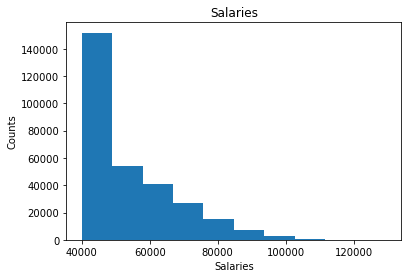

In [4]:
# create histogram of salaries
salaries = title_salary_df["salary"]

plt.hist(salaries)
plt.title("Salaries")
plt.xlabel("Salaries")
plt.ylabel("Counts")
plt.show()

The most common salary range is between \\$40K - \\$50K.  Interesting....

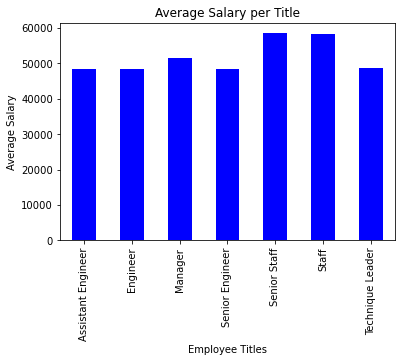

In [5]:
#create bar chart of average salary for each title
avg_salary_data = title_salary_df.groupby("title")["salary"].mean()

avg_salary_data.plot(kind="bar", facecolor="blue")
plt.title("Average Salary per Title")
plt.ylabel("Average Salary")
plt.xlabel("Employee Titles")
plt.show()

Being an assistant or senior doesn't affect the average salaries at all.  Very interesting...

In [6]:
# use SQL to pull all data from the employee table on the database for an employee/badge number
badge_no = 499942
badge_data = pd.read_sql(f"SELECT * FROM employees WHERE emp_no = {badge_no};", conn)
badge_data

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10


My "boss" told me to look up my badge number in the database, which is 499942.  Apparently my name is April Foolsday, very funny!